#Predicting Online Purchase Intent: A KNN-Based Approach to Customer Behaviour Modelling in E-Commerce

##Project Goal:
The goal of this project is to predict whether a user will complete a purchase during an
online shopping session, based on their browsing behavior, traffic sources, time spent on
product pages, and session characteristics.
Using the Online Shoppers Purchasing Intention dataset, this project applies the K-Nearest
Neighbors (KNN) algorithm along with techniques such as:

• Feature scaling and dimensionality reduction (PCA)

• Class balancing using SMOTE

• Model comparison with Logistic Regression, Decision Tree, and Random Forest

• Bias-variance tradeoff analysis

• Curse of dimensionality illustration

Through this project, we aim to help e-commerce platforms:

• Understand customer engagement patterns

• Improve personalized targeting and recommendations

• Increase conversion rates by identifying high-purchase-intent sessions

This real-world application of machine learning highlights how non-parametric models like
KNN can support data-driven marketing and operational decisions in digital commerce.

##Learning Objectives
Data Understanding & Preprocessing
1. Load and explore real-world online retail data related to user session behavior and
purchase outcomes.

2. Identify and encode categorical variables (e.g., month, visitor type) for compatibility
with distance-based models like KNN.

3. Scale numerical features using standardization to prepare data for optimal KNN
performance.

4. Split data into training and testing sets using stratified sampling to preserve class
balance.
Model Development & Core Concepts

5. Train a K-Nearest Neighbors (KNN) model and tune the number of neighbors (K)
using cross-validation.

6. Evaluate the performance of KNN using accuracy, ROC AUC, confusion matrix, and
classification report.

7. Analyze the impact of noise features by adding irrelevant variables to demonstrate
the curse of dimensionality.

8. Plot and interpret the bias-variance trade-off by comparing training and testing
accuracy across different K values.

Model Selection & Comparison

9. Train alternative classification models including Logistic Regression, Decision Tree,
and Random Forest.

10. Compare parametric and non-parametric models in terms of interpretability,
flexibility, and predictive power.

11. Demonstrate the “No Free Lunch Theorem” by showing that no model universally
outperforms others across all scenarios.
Dimensionality & Feature Engineering

12. Apply Principal Component Analysis (PCA) to reduce feature dimensionality and
observe its effect on KNN performance.


13. Discuss trade-offs between feature richness and model simplicity in high-
dimensional spaces.

Class Imbalance Handling

14. Implement SMOTE (Synthetic Minority Over-sampling Technique) to balance the
dataset and improve classification of rare events (purchases).

15. Evaluate the impact of class balancing on model accuracy and sensitivity (recall for
the positive class).
Visualization & Communication

16. Plot the ROC curve and visualize decision trade-offs using TPR vs FPR.

17. Summarize model findings into actionable business insights for e-commerce
optimization (e.g., retargeting, personalization).

18. Reflect on ethical considerations when predicting customer behavior using
behavioral data.

##Step 1 : Importing the Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

##Step 2: Load and Preview Your Dataset

In [6]:
df=pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/ML/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.shape #Find out the number of rows and columns

(12330, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [10]:
df.isnull().sum() #check whether there are null values or not

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


##Step 3: Convert Text and Boolean Columns into Numbers
Before training a machine learning model,we must make sure our data is in a format the
computer can understand. Right now, some columns in our dataset contain text values
(like "Feb" or "Returning_Visitor") or True/False values. These are easy for humans to read,
but not for machines.

This step is part of data preprocessing, which is necessary to build a working and accurate
model.

In [11]:
le= LabelEncoder()
df['Month']=le.fit_transform(df['Month'])
df['VisitorType']=le.fit_transform(df['VisitorType'])
df['Weekend']=le.fit_transform(df['Weekend'])
df['Revenue']=le.fit_transform(df['Revenue'])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


<Axes: >

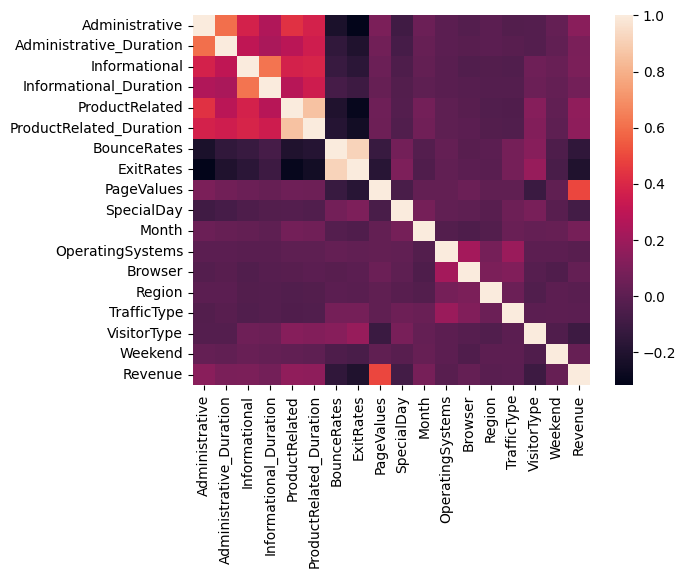

In [12]:
sns.heatmap(df.corr(),annot=False) #For checking the correlation between columns

##Step 4: Splitting the Data for Training and Testing
This step involves two things:
1. Separating the features (inputs) from the target (output you want to predict)
2. Splitting the data into two parts: one for training the model and one for testing how
well it performs

In [13]:
X=df.drop('Revenue',axis=1)
Y=df['Revenue']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

##Step 5: Scale the Input Data to Prepare for Modeling
Now that we have split data into training and testing sets, the next important step is
to scale the input features. Many machine learning models work better when all input
values are on the same scale — in other words, when the numbers are not too large or too
small compared to each other.

In [14]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##Step 6: Train a Logistic Regression Model and Make Predictions
Now that our data is ready (scaled, split, and cleaned), it's time to build and train our first
machine learning model. In this step, we will use a model called Logistic Regression to help
predict whether a user is likely to make a purchase or not.

In [15]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

In [16]:
lr_acc=accuracy_score(Y_test,Y_pred)
lr_acc*100

86.90186536901865

##Step 7: Add Random Noise to Your Data and Test Curse of Dimensionality
In this step, we will explore an important concept in machine learning: how extra,
irrelevant data can affect your model's performance.
Imagine you're trying to make a decision based on useful facts — like how many pages a
user visited or how long they stayed on the site. Now, imagine someone gives you 10 extra
pieces of completely random information that have nothing to do with the outcome. Will
we still be able to make a good decision? That's exactly what we are testing here.

In [17]:
# Add random noise to the training and testing data
X_train_noisy = np.hstack((X_train, np.random.rand(X_train.shape[0], 10)))
X_test_noisy = np.hstack((X_test, np.random.rand(X_test.shape[0], 10)))

# Train a Logistic Regression model on the noisy data
lr_noisy = LogisticRegression()
lr_noisy.fit(X_train_noisy, Y_train)

# Make predictions on the noisy test data
Y_pred_noisy = lr_noisy.predict(X_test_noisy)

# Evaluate the model with noisy data
lr_noisy_acc = accuracy_score(Y_test, Y_pred_noisy)
print("Accuracy with noisy data: ",lr_noisy_acc*100)

Accuracy with noisy data:  86.94241686942416


##Step 8: How KNN Performance Changes with Different Values of k
Now that we have built and tested a KNN model with one specific value of k (number of
neighbors), it’s time to run an experiment. In this step, we will see how changing the value
of k affects the model’s accuracy on both the training and test data.
This experiment helps us to understand the important idea of the bias-variance tradeoff,
which means finding the right balance between a model that is too simple and one that is
too complex.

0.8742903487429035


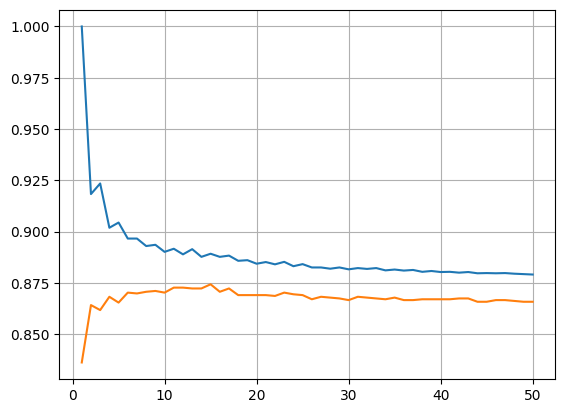

In [18]:
K_range=range(1,51)
train_acc=[]
test_acc=[]
for k in K_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  train_acc.append(knn.score(X_train,Y_train))
  test_acc.append(knn.score(X_test,Y_test))
plt.plot(K_range,train_acc,label='Training Accuracy')
plt.plot(K_range,test_acc,label='Testing Accuracy')
plt.grid('True')
print(max(test_acc))

##Step 9: Use Cross-Validation to Check Model Performance More Reliably
So far, we have trained model and tested it once on a fixed portion of the data. But what
if the results change depending on which part of the data was used? To get a more reliable
and stable understanding of our model's performance, we’ll now use a method called
cross-validation.
In this step, we will perform 10-fold cross-validation using the K-Nearest Neighbors (KNN)
model with 5 neighbors. This means the training data will be split into 10 parts, and the
model will be tested 10 times — each time with a different part of the data acting as the
test set.

• Cross-validation helps you evaluate the model more fairly and thoroughly.

• Instead of relying on just one test set, you test the model on multiple subsets of the
data.

In [19]:
# Initialize KNN model with k=5
knn_cv = KNeighborsClassifier(n_neighbors=5)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(knn_cv, X_train, Y_train, cv=10)

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation scores: [0.87537994 0.88247214 0.87436677 0.8804458  0.87626775 0.88438134
 0.89046653 0.86511156 0.88640974 0.87728195]
Mean cross-validation accuracy: 0.8792583504421577


##Step 10: Use PCA to Reduce the Number of Features and Train a KNN Model
Sometimes, datasets contain a large number of features (columns), and not all of them are
equally important. Some may carry overlapping or less useful information. To deal with this,
we can use a technique called PCA (Principal Component Analysis).
In this step, you will use PCA to reduce the number of features in your data to just a few
important ones. Then, we’ll use this simplified data to train a new KNN model and check its
accuracy.

In [20]:
pca=PCA(n_components=5)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
knn_pca=KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca,Y_train)
Y_pred_pca=knn_pca.predict(X_test_pca)
pca_acc=accuracy_score(Y_test,Y_pred_pca)
pca_acc*100

82.60340632603406

##Step 11: Compare Multiple Machine Learning Models to Find the Best One
Now that we have trained and tested a few individual models like KNN and Logistic
Regression, it’s time to go one step further: compare several models side by side to find out
which one performs best.
In this step, we will:

• Train four different models using the same training data

• Test all of them using the same test data

• Measure how well each model performs using two important metrics: accuracy and
AUC (Area Under the ROC Curve)

This helps you choose the best model based on evidence, not guesswork.

In [21]:
# Initialize the models
knn = KNeighborsClassifier(n_neighbors=5) # Using k=5 as it showed good test accuracy in the previous step
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train the models
knn.fit(X_train, Y_train)
dt.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

# Make predictions
Y_pred_knn = knn.predict(X_test)
Y_pred_dt = dt.predict(X_test)
Y_pred_rf = rf.predict(X_test)

# Calculate accuracy
knn_acc = accuracy_score(Y_test, Y_pred_knn)
dt_acc = accuracy_score(Y_test, Y_pred_dt)
rf_acc = accuracy_score(Y_test, Y_pred_rf)

print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"KNN Accuracy: {knn_acc:.4f}")
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# Calculate AUC
# For AUC, we need the probability scores for the positive class
Y_prob_lr = lr.predict_proba(X_test)[:, 1]
Y_prob_knn = knn.predict_proba(X_test)[:, 1]
Y_prob_dt = dt.predict_proba(X_test)[:, 1]
Y_prob_rf = rf.predict_proba(X_test)[:, 1]

lr_auc = roc_auc_score(Y_test, Y_prob_lr)
knn_auc = roc_auc_score(Y_test, Y_prob_knn)
dt_auc = roc_auc_score(Y_test, Y_prob_dt)
rf_auc = roc_auc_score(Y_test, Y_prob_rf)

print(f"\nLogistic Regression AUC: {lr_auc:.4f}")
print(f"KNN AUC: {knn_auc:.4f}")
print(f"Decision Tree AUC: {dt_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")

Logistic Regression Accuracy: 0.8690
KNN Accuracy: 0.8654
Decision Tree Accuracy: 0.8573
Random Forest Accuracy: 0.8962

Logistic Regression AUC: 0.8779
KNN AUC: 0.7937
Decision Tree AUC: 0.7440
Random Forest AUC: 0.9221


##Step 12: Handle Class Imbalance Using SMOTE and Train a KNN Model
In many real-life datasets, one type of outcome (like “no purchase”) appears much more
often than the other (like “purchase”). This is called class imbalance, and it can cause
machine learning models to be biased — they may mostly predict the majority class and
ignore the important minority cases.
To solve this, we use a technique called SMOTE (Synthetic Minority Over-sampling
Technique). It creates new, artificial examples of the minority class so the model has more
balanced data to learn from.
In this step, we will use SMOTE to balance the training data, then train a K-Nearest
Neighbors (KNN) model on the balanced data, and finally test its performance on the test
data.

In [22]:
df['Revenue'].value_counts()

,count
Revenue,
0,10422
1,1908


In [23]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Train a KNN model on the SMOTE-balanced data
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_smote, Y_train_smote)

# Make predictions on the original test data
Y_pred_smote = knn_smote.predict(X_test)

# Evaluate the model
smote_acc = accuracy_score(Y_test, Y_pred_smote)
smote_auc = roc_auc_score(Y_test, knn_smote.predict_proba(X_test)[:, 1])

print(f"KNN Accuracy with SMOTE: {smote_acc:.4f}")
print(f"KNN AUC with SMOTE: {smote_auc:.4f}")

KNN Accuracy with SMOTE: 0.7778
KNN AUC with SMOTE: 0.8012


##Step 13: Summarize and Present the Results of All Your Models
Now that we have trained multiple machine learning models, applied advanced techniques
like PCA and SMOTE, and measured different accuracy scores, it’s time to bring everything
together.

This final step helps you compare all the models side by side, so we can make a well-
informed decision about which one works best. It’s like preparing our final project results

for a report or presentation.

In [24]:
# Create a dictionary to store the results
results = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'KNN with PCA', 'KNN with SMOTE'],
    'Accuracy': [lr_acc, knn_acc, dt_acc, rf_acc, pca_acc, smote_acc],
    'AUC': [lr_auc, knn_auc, dt_auc, rf_auc, 0.0, smote_auc]
}

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results)

# Print the results
display(results_df)

,Model,Accuracy,AUC
0,Logistic Regression,0.869019,0.877888
1,KNN,0.865369,0.793721
2,Decision Tree,0.857259,0.744039
3,Random Forest,0.896188,0.922101
4,KNN with PCA,0.826034,0.000000
5,KNN with SMOTE,0.777778,0.801241


##Conclusion
In this project, I applied machine learning techniques to predict whether users will complete a purchase during an online shopping session. Using the "Online Shoppers Purchasing Intention" dataset, I explored user session behaviors, including time spent on product pages and traffic sources. The K-Nearest Neighbors (KNN) algorithm was at the core of the prediction model, alongside techniques such as feature scaling (via standardization), dimensionality reduction (using PCA), and class balancing (using SMOTE) to address imbalances in the dataset.

The project compared different models, including Logistic Regression, Decision Trees, and Random Forests, with a focus on optimizing KNN. I also explored key machine learning concepts such as bias-variance tradeoff, the curse of dimensionality, and the importance of dimensionality reduction to improve model performance. Additionally, I demonstrated the impact of balancing the dataset on classification accuracy, especially in predicting the rare event of a purchase.

Ultimately, the project helps e-commerce platforms better understand customer engagement patterns, improve personalized targeting, and increase conversion rates by identifying high-purchase-intent sessions. The insights gained from this analysis can be used to guide business decisions and improve marketing strategies in digital commerce.